In [1]:
!pip install chart_studio
!pip install plotly-express
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=c71d42f6a7f01ece819549c6daf5f6a6b4b0181ff6761b0008ea0748580f3e82
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 4.3 MB/s 
     |████████████████████████████████| 9.8 MB 50.5 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=b8bd5065199c0020e4cab4f066a8b920ff01700a7dea0d37a3ac59162834d53c
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7

In [2]:
# All imports in one place. Bringing in csv to work with and checking to make sure it was imported.

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import stats
from scipy.stats import norm
from statistics import mode
import seaborn as sns
import time
from datetime import datetime

In [3]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import chart_studio.plotly as py
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_excel('/content/drive/MyDrive/zirconom er statistics mostafa samy.xlsx')
df.head()

,Zirconfill_1_day_DTS,Zirconfill_7_days_DTS,Zirconomer_1_day_DTS,Zirconomer_7_days_DTS,Zirconfill_1_day_fracture_resistence,Zirconfill_7_days_fracture_resistence,Zirconomer_1_day_fracture_resistence,Zirconomer_7_days_fracture_resistence
0,50.86019,57.255356,7.272727,8.935212,748.60,839.90,744.70,891.10
1,42.83600,41.797851,13.624140,14.149130,535.45,1245.17,1110.60,641.90
2,73.09271,67.526218,13.866050,8.652126,509.87,817.07,890.30,720.20
3,31.50743,41.705462,9.732999,12.756870,674.96,1222.16,956.27,652.81
4,58.78510,76.457010,6.343990,9.503957,738.42,851.86,1084.01,749.98


In [6]:
df.isnull().sum()

Zirconfill_1_day_diametral     0
Zirconfill_7_days_diametral    0
Zirconomer_1_day_diametral     0
Zirconomer_7_days_diametral    0
Zirconfill_1_day_fracture      0
Zirconfill_7_days_fracture     0
Zirconomer_1_day_fracture      0
Zirconomer_7_days_fracture     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Zirconfill_1_day_diametral   10 non-null     float64
 1   Zirconfill_7_days_diametral  10 non-null     float64
 2   Zirconomer_1_day_diametral   10 non-null     float64
 3   Zirconomer_7_days_diametral  10 non-null     float64
 4   Zirconfill_1_day_fracture    10 non-null     float64
 5   Zirconfill_7_days_fracture   10 non-null     float64
 6   Zirconomer_1_day_fracture    10 non-null     float64
 7   Zirconomer_7_days_fracture   10 non-null     float64
dtypes: float64(8)
memory usage: 768.0 bytes


In [8]:
df.describe()

,Zirconfill_1_day_diametral,Zirconfill_7_days_diametral,Zirconomer_1_day_diametral,Zirconomer_7_days_diametral,Zirconfill_1_day_fracture,Zirconfill_7_days_fracture,Zirconomer_1_day_fracture,Zirconomer_7_days_fracture
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,52.195913,58.553807,9.400024,17.186839,630.724000,1049.822000,957.419000,750.912000
std,13.398423,12.378721,3.148243,8.671914,84.339819,163.958835,118.441286,93.141736
min,31.507430,41.705462,6.225717,8.652126,509.870000,817.070000,744.700000,641.900000
25%,43.430075,50.867835,6.528065,10.070128,557.417500,903.140000,878.817500,668.907500
50%,49.936145,57.027358,8.502863,13.453000,652.450000,1063.030000,978.790000,735.090000
75%,61.461775,67.435401,12.101527,24.938075,674.492500,1193.595000,1041.815000,818.680000
max,73.092710,76.457010,13.866050,31.512580,748.600000,1245.170000,1110.600000,891.100000


In [9]:
df.dtypes

Zirconfill_1_day_diametral     float64
Zirconfill_7_days_diametral    float64
Zirconomer_1_day_diametral     float64
Zirconomer_7_days_diametral    float64
Zirconfill_1_day_fracture      float64
Zirconfill_7_days_fracture     float64
Zirconomer_1_day_fracture      float64
Zirconomer_7_days_fracture     float64
dtype: object

In [10]:
df.shape

(10, 8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb02770fd0>,
      dtype=object)

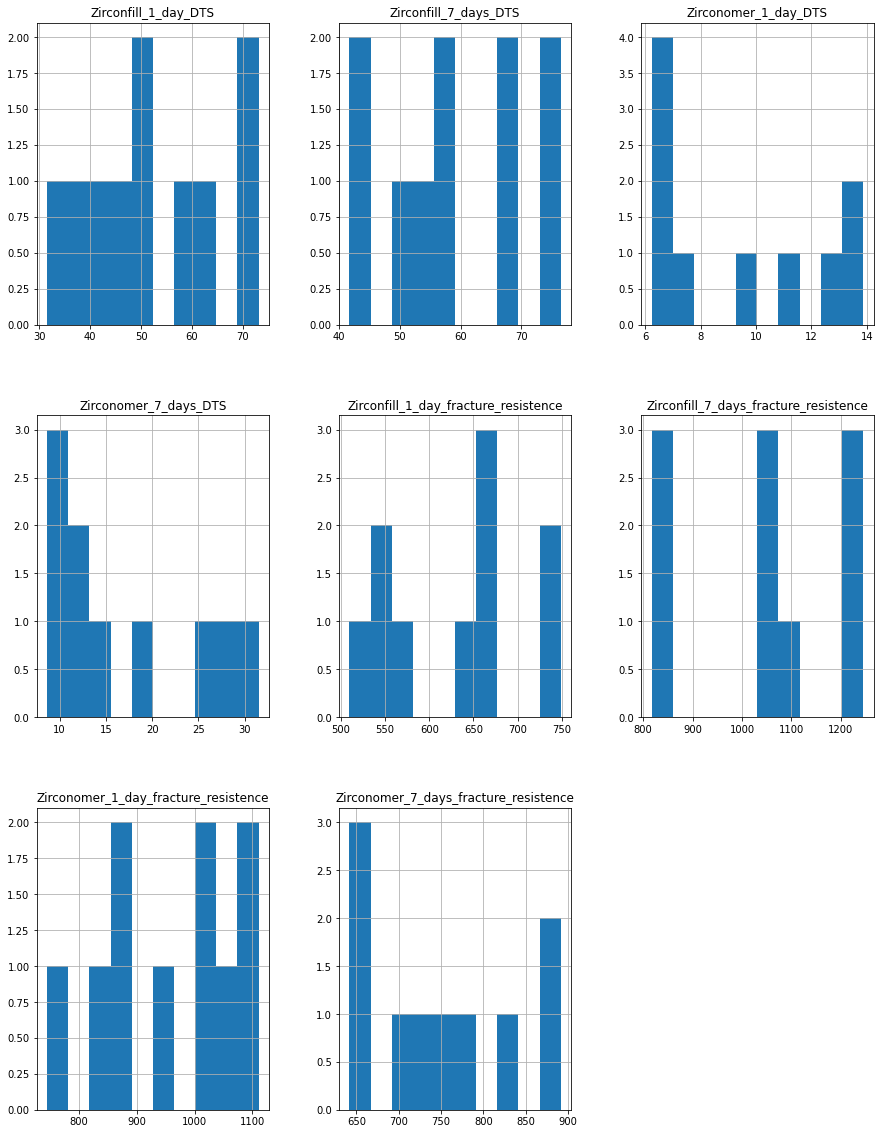

In [65]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [12]:
fig = px.histogram(df, x=['Zirconfill_1_day_diametral', 'Zirconomer_1_day_diametral'],
                   
                   nbins=20)
fig.show()

In [13]:
fig = px.histogram(df, x=['Zirconfill_7_days_diametral', 'Zirconomer_7_days_diametral'],
                   nbins=20)
fig.show()

In [14]:
df1 = df["Zirconfill_1_day_diametral"]
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.972, p=0.911
Sample looks Gaussian (fail to reject H0)


In [15]:

# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

# normality test
result = anderson(df1)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.166
15.000: 0.501, data looks normal (fail to reject H0)
10.000: 0.570, data looks normal (fail to reject H0)
5.000: 0.684, data looks normal (fail to reject H0)
2.500: 0.798, data looks normal (fail to reject H0)
1.000: 0.950, data looks normal (fail to reject H0)


In [16]:

# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.483, p=0.785
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



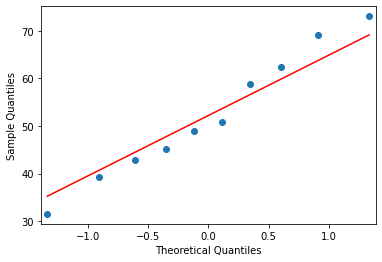

In [17]:

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df1, line='s')
pyplot.show()

In [18]:
df2 = df["Zirconfill_7_days_diametral"]
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.937, p=0.523
Sample looks Gaussian (fail to reject H0)


In [19]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

# normality test
result = anderson(df2)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.258
15.000: 0.501, data looks normal (fail to reject H0)
10.000: 0.570, data looks normal (fail to reject H0)
5.000: 0.684, data looks normal (fail to reject H0)
2.500: 0.798, data looks normal (fail to reject H0)
1.000: 0.950, data looks normal (fail to reject H0)


In [20]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.069, p=0.586
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



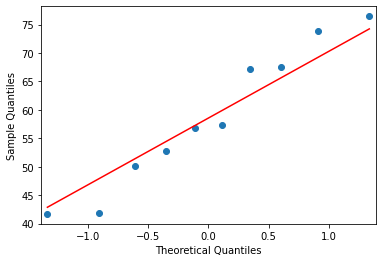

In [21]:

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df2, line='s')
pyplot.show()

In [22]:
df3 = df["Zirconomer_1_day_diametral"]
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.846, p=0.052
Sample looks Gaussian (fail to reject H0)


In [23]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

# normality test
result = anderson(df3)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.624
15.000: 0.501, data does not look normal (reject H0)
10.000: 0.570, data does not look normal (reject H0)
5.000: 0.684, data looks normal (fail to reject H0)
2.500: 0.798, data looks normal (fail to reject H0)
1.000: 0.950, data looks normal (fail to reject H0)


In [24]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=3.846, p=0.146
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



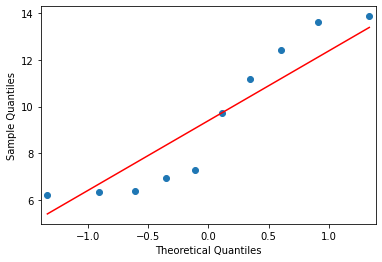

In [25]:

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df3, line='s')
pyplot.show()

In [26]:
df4 = df["Zirconomer_7_days_diametral"]
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df4)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.859, p=0.075
Sample looks Gaussian (fail to reject H0)


In [27]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

# normality test
result = anderson(df4)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.603
15.000: 0.501, data does not look normal (reject H0)
10.000: 0.570, data does not look normal (reject H0)
5.000: 0.684, data looks normal (fail to reject H0)
2.500: 0.798, data looks normal (fail to reject H0)
1.000: 0.950, data looks normal (fail to reject H0)


In [28]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df4)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=2.277, p=0.320
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



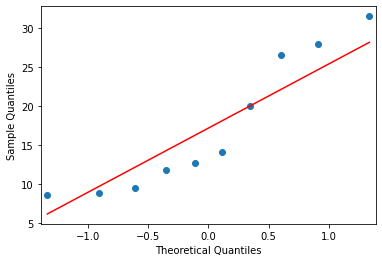

In [29]:

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df4, line='s')
pyplot.show()

In [30]:
df5 = df["Zirconfill_1_day_fracture"]
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df5)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.927, p=0.418
Sample looks Gaussian (fail to reject H0)


In [31]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

# normality test
result = anderson(df5)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.339
15.000: 0.501, data looks normal (fail to reject H0)
10.000: 0.570, data looks normal (fail to reject H0)
5.000: 0.684, data looks normal (fail to reject H0)
2.500: 0.798, data looks normal (fail to reject H0)
1.000: 0.950, data looks normal (fail to reject H0)


In [32]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df5)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.557, p=0.459
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



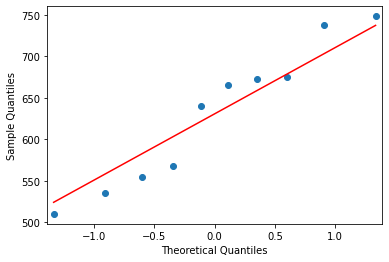

In [33]:

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df5, line='s')
pyplot.show()

In [34]:
df6 = df["Zirconfill_7_days_fracture"]
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df6)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.875, p=0.114
Sample looks Gaussian (fail to reject H0)


In [35]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

# normality test
result = anderson(df6)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.524
15.000: 0.501, data does not look normal (reject H0)
10.000: 0.570, data looks normal (fail to reject H0)
5.000: 0.684, data looks normal (fail to reject H0)
2.500: 0.798, data looks normal (fail to reject H0)
1.000: 0.950, data looks normal (fail to reject H0)


In [36]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df6)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.716, p=0.424
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



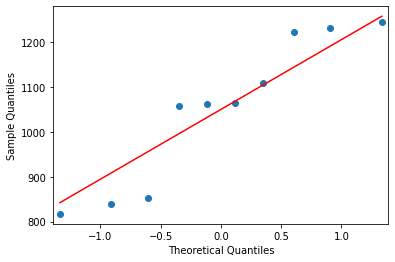

In [37]:

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df6, line='s')
pyplot.show()

In [38]:
df7 = df["Zirconomer_1_day_fracture"]
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df7)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.957, p=0.749
Sample looks Gaussian (fail to reject H0)


In [39]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

# normality test
result = anderson(df7)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.217
15.000: 0.501, data looks normal (fail to reject H0)
10.000: 0.570, data looks normal (fail to reject H0)
5.000: 0.684, data looks normal (fail to reject H0)
2.500: 0.798, data looks normal (fail to reject H0)
1.000: 0.950, data looks normal (fail to reject H0)


In [40]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df7)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.707, p=0.702
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



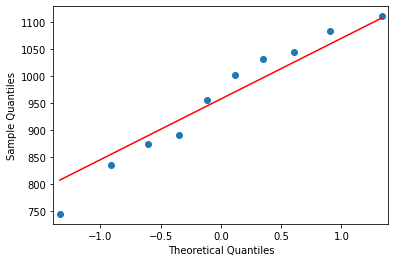

In [41]:

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df7, line='s')
pyplot.show()

In [42]:
df8 = df["Zirconomer_7_days_fracture"]
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df8)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.912, p=0.298
Sample looks Gaussian (fail to reject H0)


In [43]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

# normality test
result = anderson(df8)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.326
15.000: 0.501, data looks normal (fail to reject H0)
10.000: 0.570, data looks normal (fail to reject H0)
5.000: 0.684, data looks normal (fail to reject H0)
2.500: 0.798, data looks normal (fail to reject H0)
1.000: 0.950, data looks normal (fail to reject H0)


In [44]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df8)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.646, p=0.439
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



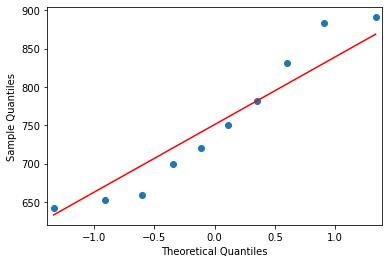

In [45]:

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df8, line='s')
pyplot.show()

In [46]:
import plotly.graph_objects as go

fig = go.Figure()

for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

In [47]:
import plotly.graph_objects as go

fig = go.Figure()

for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

In [48]:
import plotly.graph_objects as go

fig = go.Figure()

for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

In [49]:
import plotly.graph_objects as go

fig = go.Figure()

for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

In [50]:
import plotly.graph_objects as go

fig = go.Figure()

for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

In [51]:
import plotly.graph_objects as go

fig = go.Figure()

for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

In [52]:
import plotly.graph_objects as go

fig = go.Figure()

for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

In [53]:
import plotly.graph_objects as go

fig = go.Figure()

for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

In [54]:
# formulat interface to statsmodels (standard linear models)
import statsmodels.formula.api as smf

# easy-to-use traditional psychological stats (t-test, anova)
import pingouin as pg

# hate these things
import warnings
warnings.filterwarnings("ignore")

In [55]:
#H0 => µ1 = µ2 (population mean of dataset1 is equal to dataset2)

#HA => µ1 ≠µ2 (population mean of dataset1 is different from dataset2)

# Python program to conduct two-sample
# T-test using pingouin library

# Importing library

from statsmodels.stats.weightstats import ttest_ind
import numpy as np
import pingouin as pg

# Creating data groups
data_group1 = df1.to_numpy()
data_group2 = df2.to_numpy()
# Conducting two-sample ttest
result = pg.ttest(data_group1,
				data_group2,
				correction=True)

# Print the result
print(result)


               T        dof alternative     p-val           CI95%   cohen-d  \
T-test -1.102184  17.888378   two-sided  0.284991  [-18.48, 5.77]  0.492911   

         BF10     power  
T-test  0.607  0.181199  


In [56]:

# Example of the Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(df1, df2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-1.102, p=0.285
Probably the same distribution


In [57]:
#H0 => µ1 = µ2 (population mean of dataset1 is equal to dataset2)

#HA => µ1 ≠µ2 (population mean of dataset1 is different from dataset2)

# Python program to conduct two-sample
# T-test using pingouin library

# Importing library

from statsmodels.stats.weightstats import ttest_ind
import numpy as np
import pingouin as pg

# Creating data groups
data_group1 = df1.to_numpy()
data_group3 = df3.to_numpy()
# Conducting two-sample ttest
result = pg.ttest(data_group1,
				data_group3,
				correction=False)

# Print the result

result

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.832832,18,two-sided,1.156896e-08,"[33.65, 51.94]",4.397376,6.065e+05,1.0


In [58]:
# Example of the Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(df1, df3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=9.833, p=0.000
Probably different distributions


In [59]:
#H0 => µ1 = µ2 (population mean of dataset1 is equal to dataset2)

#HA => µ1 ≠µ2 (population mean of dataset1 is different from dataset2)

# Python program to conduct two-sample
# T-test using pingouin library

# Importing library

from statsmodels.stats.weightstats import ttest_ind
import numpy as np
import pingouin as pg

# Creating data groups
data_group2 = df2.to_numpy()
data_group4 = df4.to_numpy()
# Conducting two-sample ttest
result = pg.ttest(data_group2,
				data_group4,
        paired=False,
				correction=True)

# Print the result

result

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,8.655109,16.119175,two-sided,1.859051e-07,"[31.24, 51.49]",3.870682,1.06e+05,1.0


In [60]:
# Example of the Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(df2, df4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=8.655, p=0.000
Probably different distributions


In [61]:
# Example of the Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(df5, df6)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-7.188, p=0.000
Probably different distributions


In [62]:
# Example of the Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(df5, df7)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-7.105, p=0.000
Probably different distributions


In [63]:
# Example of the Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(df6, df8)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=5.013, p=0.000
Probably different distributions
